In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np

In [2]:
pokedex = pd.read_csv('../../boss1/notebooks/cleaned_df.csv', index_col='Unnamed: 0.1')
pokedex = pokedex.drop(columns='Unnamed: 0')
pokedex

,pokedex_number,name,generation,is_sub_legendary,is_legendary,is_mythical,species,type_1,type_2,height_m,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
45,34,Nidoking,1,0,0,0,Drill Pokémon,Poison,Ground,1.4,...,2.00,1.00,2.0,0.5,0.5,1.0,1.0,1.0,1.00,0.5
59,46,Paras,1,0,0,0,Mushroom Pokémon,Bug,Grass,0.3,...,0.25,4.00,1.0,2.0,2.0,1.0,1.0,1.0,1.00,1.0
60,47,Parasect,1,0,0,0,Mushroom Pokémon,Bug,Grass,1.0,...,0.25,4.00,1.0,2.0,2.0,1.0,1.0,1.0,1.00,1.0
103,79,Slowpoke,1,0,0,0,Dopey Pokémon,Water,Psychic,1.2,...,1.00,1.00,0.5,2.0,1.0,2.0,1.0,2.0,0.50,1.0
104,80,Slowbro,1,0,0,0,Hermit Crab Pokémon,Water,Psychic,1.6,...,1.00,1.00,0.5,2.0,1.0,2.0,1.0,2.0,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,715,Noivern,6,0,0,0,Sound Wave Pokémon,Flying,Dragon,1.5,...,0.00,1.00,1.0,0.5,2.0,1.0,2.0,1.0,1.00,2.0
864,742,Cutiefly,7,0,0,0,Bee Fly Pokémon,Bug,Fairy,0.1,...,0.50,2.00,1.0,0.5,2.0,1.0,0.0,0.5,2.00,1.0
865,743,Ribombee,7,0,0,0,Bee Fly Pokémon,Bug,Fairy,0.2,...,0.50,2.00,1.0,0.5,2.0,1.0,0.0,0.5,2.00,1.0
904,777,Togedemaru,7,0,0,0,Roly-Poly Pokémon,Electric,Steel,0.3,...,4.00,0.25,0.5,0.5,0.5,1.0,0.5,1.0,0.25,0.5


# Número de Pokémon por geração
### Crie uma visualização que mostre o número de Pokémon por geração, mas vá além de um gráfico simples de barras. Experimente combinar um gráfico de barras com uma linha que exiba a média de 'attack', 'defense' e 'speed' por geração. Utilize o Plotly para criar uma visualização interativa.

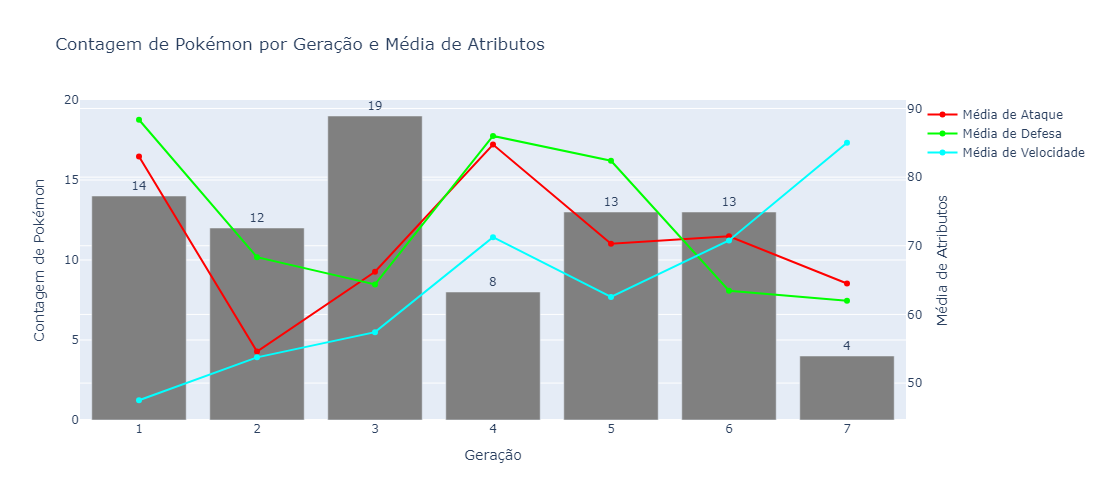

In [3]:
# Calculando as medidas para plotar o gráfico
generation_count = pokedex['generation'].value_counts().sort_index()
attack_mean = pokedex.groupby('generation')['attack'].mean()
defense_mean = pokedex.groupby('generation')['defense'].mean()
speed_mean = pokedex.groupby('generation')['speed'].mean()

# Criando dataframe de base
data = pd.DataFrame({
    'generation': generation_count.index,
    'count': generation_count.values,
    'attack_mean': attack_mean.values,
    'defense_mean': defense_mean.values,
    'speed_mean': speed_mean.values
})

# Criando o gráfico de barras
fig = px.bar(data, x='generation', y='count', title='Contagem de Pokémon por Geração e Média de Atributos', color_discrete_sequence=['grey'], text='count')
fig.update_traces(textposition='outside')

# Adicionando as linhas com médias dos atributos
fig.add_scatter(x=data['generation'], y=data['attack_mean'], mode='lines+markers', line=dict(color='red', width=2), name='Média de Ataque', yaxis='y2')
fig.add_scatter(x=data['generation'], y=data['defense_mean'], mode='lines+markers', line=dict(color='lime', width=2), name='Média de Defesa', yaxis='y2')
fig.add_scatter(x=data['generation'], y=data['speed_mean'], mode='lines+markers', line=dict(color='cyan', width=2), name='Média de Velocidade', yaxis='y2')

fig.update_layout(
    yaxis=dict(title='Contagem de Pokémon'),
    xaxis=dict(title='Geração'),
    yaxis2=dict(title='Média de Atributos', overlaying='y', side='right'),
    height=500
)

# Exibindo o gráfico
fig.show()


### Analise a distribuição de Pokémon ao longo das gerações. Há tendências ou mudanças  significativas na força dos Pokémon entre as gerações? Como isso pode estar relacionado à história ou ao design do jogo em cada geração?

Identificamos que ao longo das primeiras gerações, houve uma tendência de crescimento em todos os atributos analisados (ataque, defesa e velocidade). Acreditamos que ao longo dos lançamentos de novas gerações, foi necessária a criação de pokémons mais fortes para que a evolução da história fizesse sentido.

# Distribuição por Atributo
### Utilize um boxplot para visualizar a distribuição de 'attack', 'defense' e 'speed'para cada tipo de Pokémon. Considere criar gráficos separados para cada atributo.

In [4]:
attack_graphic = px.box(pokedex, x='type_1', y='attack', color='type_1', title='Distribuição de pontos de ataque por tipo de Pokémon', )
attack_graphic.update_layout(xaxis_title='Tipos de Pokémon', legend_title='Tipo de Pokémon', yaxis_title='Pontuação')

attack_graphic.show()

In [5]:
defense_graphic = px.box(pokedex, x='type_1', y='defense', color='type_1', title='Distribuição de pontos de defesa por tipo de Pokémon')
defense_graphic.update_layout(xaxis_title='Tipos de Pokémon', legend_title='Tipo de Pokémon', yaxis_title='Pontuação')

defense_graphic.show()

In [6]:
speed_graphic = px.box(pokedex, x='type_1', y='speed', color='type_1', title='Distribuição de pontos de velocidade por tipo de Pokémon')
speed_graphic.update_layout(xaxis_title='Tipos de Pokémon', legend_title='Tipo de Pokémon', yaxis_title='Pontuação')

speed_graphic.show()

### Quais tipos tendem a ter os maiores ou menores valores de 'attack', 'defense' e 'speed'? Existe algum tipo que é notavelmente equilibrado ou forte em algum atributo?


In [7]:
grouped = pokedex.groupby('type_1')

stats = grouped[['attack', 'defense', 'speed']].describe()

median_stats = grouped[['attack', 'defense', 'speed']].median()

print("Medianas por tipo:")
print(median_stats)

Medianas por tipo:
          attack  defense  speed
type_1                          
Bug         67.5     70.0   50.0
Dark        82.5     79.0   53.0
Electric    56.5     54.5   98.5
Fairy       45.0     90.0   60.0
Fighting   110.0     75.0   90.0
Flying      50.0     57.5   89.0
Ghost       90.0     62.0   47.0
Grass       67.0     60.0   70.0
Ground     107.5    107.5   36.0
Ice         57.5     60.0   55.0
Normal      85.0     60.0   60.0
Poison      75.0     90.0   65.0
Psychic     45.0     43.0   72.0
Rock        70.0    102.5   55.0
Steel       85.0     85.0   50.0
Water       70.0     80.0   50.0


In [8]:
grouped = pokedex.groupby('type_1')

median_stats = grouped[['attack', 'defense', 'speed']].median()

median_stats['overall_median'] = median_stats.median(axis=1)

max_overall_median_type = median_stats['overall_median'].idxmax()
min_overall_median_type = median_stats['overall_median'].idxmin()

print(f"O tipo com a maior mediana geral é: {max_overall_median_type}")
print(f"O tipo com a menor mediana geral é: {min_overall_median_type}")

O tipo com a maior mediana geral é: Ground
O tipo com a menor mediana geral é: Psychic


# Seleção de pokemon para bolsa
### Simule a situação na qual você receberá 3 Pokémon de 10 tipos diferentes, selecionados aleatoriamente. Desses 30 Pokémon, você deve automatizar a seleção de 6 Pokémon para a sua bolsa com base em um critério otimizado. Para isso, utilize uma métrica ponderada que leve em consideração os atributos attack, defense, speed e as colunas de against, aplicando pesos customizados para cada critério. Além disso, a equipe final deve conter tipos variados, sem repetição de tipos.

In [ ]:
def simulate_selection(pokedex, n_types=10, n_pokemon_per_type=3, n_selection=6):
    selected_types = np.random.choice(pokedex['type_1'].unique(), n_types, replace=False)
    
    selected_pokemon = []
    for poke_type in selected_types:
        pokemon_of_type = pokedex[pokedex['type_1'] == poke_type]
        selected_pokemon.extend(pokemon_of_type.sample(n_pokemon_per_type, replace=True).to_dict('records'))
    
    selected_pokemon_df = pd.DataFrame(selected_pokemon)
    
    selected_pokemon_df['total_score'] = selected_pokemon_df[['attack', 'defense', 'speed']].sum(axis=1)
    
    optimized_selection = selected_pokemon_df.nlargest(n_selection, 'total_score')
    
    return optimized_selection

optimized_pokemon = simulate_selection(pokedex)

print("Pokémon selecionados para a bolsa:")
print(optimized_pokemon)

Pokémon selecionados para a bolsa:
    pokedex_number       name  generation  is_sub_legendary  is_legendary  \
19             464  Rhyperior           4                 0             0   
15             141   Kabutops           1                 0             0   
26             452    Drapion           4                 0             0   
5              286    Breloom           3                 0             0   
1              560    Scrafty           5                 0             0   
2              687    Malamar           6                 0             0   

    is_mythical              species  type_1    type_2  height_m  ...  \
19            0        Drill Pokémon  Ground      Rock       2.4  ...   
15            0    Shellfish Pokémon    Rock     Water       1.3  ...   
26            0   Ogre Scorp Pokémon  Poison      Dark       1.3  ...   
5             0     Mushroom Pokémon   Grass  Fighting       1.2  ...   
1             0      Hoodlum Pokémon    Dark  Fighting      

### Crie um gráfico de dispersão 3D para visualizar attack, defense e speed dos Pokémon selecionados.

In [ ]:
fig = px.scatter_3d(optimized_pokemon, 
                    x='attack', 
                    y='defense', 
                    z='speed', 
                    color='type_1', 
                    text='type_1', 
                    title='Dispersão 3D dos Pokémon Selecionados',
                    labels={
                        'attack': 'Attack',
                        'defense': 'Defense',
                        'speed': 'Speed',
                        'type_1': 'Type'
                    })

fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers+text'))

fig.update_layout(scene=dict(
                    xaxis_title='Attack',
                    yaxis_title='Defense',
                    zaxis_title='Speed'))

fig.show()

# Justificar seleção dos 6 Pokémon, explicando como os critérios otimizados ajudaram a montar uma equipe equilibrada.

### Justifique a seleção dos 6 Pokémon, explicando como os critérios otimizados ajudaram a montar uma equipe equilibrada. Discuta os trade-offs entre atributos ofensivos e defensivos, além das resistências e fraquezas de cada Pokémon contra outros tipos. A sua equipe final é equilibrada ou focada em certos atributos? Explique como sua análise influenciou essa decisão estratégica.

Os 6 Pokémon foram selecionados com base em uma pontuação total que pondera attack, defense, e speed, além das colunas de resistência (against), que indicam como cada Pokémon se sai contra diferentes tipos. Os valores dos atributos garantem que cada Pokémon na equipe tenha um papel específico, cobrindo tanto ataques quanto defesas.

**Distribuição Ofensiva e Defensiva:**

* **Rhyperior** *(Ground/Rock)*: Seu elevado valor de defesa o torna essencial para resistir a ataques físicos. Com alta pontuação contra flying e rock, ele cobre a equipe em casos de Pokémon mais ágeis, enquanto sua fraqueza a water e grass é coberta por outros Pokémon da equipe.
* **Kabutops** *(Rock/Water)*: Com um bom equilíbrio entre ataque e defesa, Kabutops ajuda a criar uma barreira contra o tipo fire, comum em muitos times. Ele também é um contrapeso útil ao lado ofensivo da equipe.
* **Drapion** *(Poison/Dark)*: Possui resistência elevada contra psychic e boa defesa contra fairy, o que o torna um Pokémon estratégico em situações contra ataques psíquicos e de fada, que normalmente representam ameaça ao tipo fighting presente na equipe.
* **Breloom** *(Grass/Fighting)*: Com grande capacidade ofensiva, Breloom é um dos principais atacantes da equipe. Sua resistência a rock e dark o torna uma opção segura para enfrentar Pokémon resistentes.
* **Scrafty** *(Dark/Fighting)*: Esse Pokémon ajuda a cobrir a equipe com boa resistência contra o tipo ghost, oferecendo também versatilidade com habilidades defensivas e ofensivas equilibradas. Sua resistência contra dark complementa as fraquezas de outros tipos.
* **Malamar** *(Dark/Psychic)*: Com atributos de ataque e resistência contra psychic, ele equilibra a equipe, dando suporte ao lidar com Pokémon de ataque psíquico e bug.

A equipe foi montada para minimizar fraquezas coletivas. Com tipos variados, cada Pokémon cobre uma fraqueza de outro, mantendo a equipe menos vulnerável a ataques específicos, como psychic, fairy, e rock. Essa diversidade nos tipos torna a equipe capaz de lidar com uma gama maior de adversários.

Esta equipe é equilibrada, pois combina Pokémon de defesa forte (como Rhyperior e Drapion) com atacantes rápidos e ofensivos (como Breloom e Kabutops). Essa formação permite que a equipe se adapte tanto a lutas de curto prazo com ofensiva elevada quanto a batalhas mais longas, onde resistência e defesa são fundamentais.

# Analise de forças e fraquezas
### Depois de selecionar os 6 Pokémon, analise detalhadamente suas forças e fraquezas. Utilize as colunas de ‘against’ para calcular um índice de força total para cada Pokémon contra todos os outros tipos e produza um gráfico radar (spider plot) para cada um dos 6 Pokémon. Além disso, crie uma matriz de calor (heatmap) que mostre as fraquezas mais críticas da sua equipe.Analise as vulnerabilidades e vantagens da sua equipe em potencial. Explique se a equipe é bem balanceada contra adversários ou se possui fraquezas notáveis. Como isso afeta suas chances em uma batalha hipotética?